In [1]:
import tensorflow as tf


In [2]:
import numpy as np
tensor_1d = np.array([1.3, 1, 4.0, 23.99])
print(tensor_1d) 

[ 1.3   1.    4.   23.99]


In [3]:
print(tf.__version__)
print(tf.test.gpu_device_name())

# Helper function to download data and extract
import os
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

2.3.0



# Step 1
###    Download and order data (images) from food-101 dataset into train, val, & test datasets.  
> The food-101 dataset is already split into meta-folders for train & val, so we will split the val set in two to get 
our test data(R folder).

In [4]:
get_data_extract()


Streaming output truncated to the last 5000 lines.
food-101/images/cannoli/3201965.jpg
food-101/images/cannoli/3778102.jpg
food-101/images/cannoli/2674065.jpg
food-101/images/cannoli/1169899.jpg
food-101/images/cannoli/1378086.jpg
food-101/images/cannoli/803909.jpg
food-101/images/cannoli/1067240.jpg
food-101/images/cannoli/3002709.jpg
food-101/images/cannoli/2612632.jpg
food-101/images/cannoli/3627612.jpg
food-101/images/cannoli/1798703.jpg
food-101/images/cannoli/560632.jpg
food-101/images/cannoli/512468.jpg
food-101/images/cannoli/2331523.jpg
food-101/images/cannoli/3118302.jpg
food-101/images/cannoli/1499412.jpg
food-101/images/cannoli/1557459.jpg
food-101/images/cannoli/146566.jpg
food-101/images/cannoli/96922.jpg
food-101/images/cannoli/1699562.jpg
food-101/images/cannoli/730051.jpg
food-101/images/cannoli/2177977.jpg
food-101/images/cannoli/2767028.jpg
food-101/images/cannoli/6564.jpg
food-101/images/cannoli/553447.jpg
food-101/images/cannoli/3452001.jpg
food-101/images/cannoli/

In [5]:
!ls food-101/

import os
# for filename in os.listdir('food-101/images')[:10]:
#     print(filename)
for filename in os.listdir('food-101/images')[60:70]:
    print(filename)

images	license_agreement.txt  meta  README.txt
scallops
bruschetta
caesar_salad
chocolate_mousse
french_fries
bread_pudding
gyoza
carrot_cake
ice_cream
french_toast


In [6]:
import numpy as np
from collections import defaultdict
import collections
import os

In [7]:
# Helper method to split dataset into train and test folders
from shutil import copy
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [8]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [9]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [10]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find food-101/train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
75750


In [11]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find food-101/test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [12]:
# Helper method to create train_mini and test_mini data samples
from shutil import copytree, rmtree
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))

In [13]:
# picking 4 food items and generating separate data folders for the same
food_list = ['ramen','guacamole','donuts','churros','gnocchi', 'tiramisu', 'scallops', 'beignets', 
             'french_toast', 'garlic_bread', 'falafel', 'escargots', 'edamame', 'pancakes', 'mussels' ]
R_list = []
src_train = 'food-101/train'
dest_train = 'food-101/train_mini'
src_test = 'food-101/test'
dest_test = 'food-101/test_mini'

dest_R = 'food-101/R'

print(len(food_list))

15


In [14]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into ramen
Copying images into guacamole
Copying images into donuts
Copying images into churros
Copying images into gnocchi
Copying images into tiramisu
Copying images into scallops
Copying images into beignets
Copying images into french_toast
Copying images into garlic_bread
Copying images into falafel
Copying images into escargots
Copying images into edamame
Copying images into pancakes
Copying images into mussels


In [15]:
print("Total number of samples in train folder")

!find food-101/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
11250


In [16]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into ramen
Copying images into guacamole
Copying images into donuts
Copying images into churros
Copying images into gnocchi
Copying images into tiramisu
Copying images into scallops
Copying images into beignets
Copying images into french_toast
Copying images into garlic_bread
Copying images into falafel
Copying images into escargots
Copying images into edamame
Copying images into pancakes
Copying images into mussels


In [17]:
print("Total number of samples in test folder")
!find food-101/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
3750


In [18]:
print("Creating Real Test data folder with new classes")
dataset_mini(food_list, src_test, dest_R)

Creating Real Test data folder with new classes
Copying images into ramen
Copying images into guacamole
Copying images into donuts
Copying images into churros
Copying images into gnocchi
Copying images into tiramisu
Copying images into scallops
Copying images into beignets
Copying images into french_toast
Copying images into garlic_bread
Copying images into falafel
Copying images into escargots
Copying images into edamame
Copying images into pancakes
Copying images into mussels


In [19]:
dataset_mini(food_list[4:7], src_test, dest_R)

Copying images into gnocchi
Copying images into tiramisu
Copying images into scallops


In [20]:
print("Total number of samples in R folder")
!find food-101/R -type d -or -type f -printf '.' | wc -c

Total number of samples in R folder
750


# Step 2
### a) Prepare and Augment Data
### b) Build Deep Learning Model using Tensorflow with Keras Wrapper
### c) Train Data on Model
> 3 models will be trained:

                            model 1 (basic model)
                            model 2 (deeper model)
                            model 3 (inception layer)
> The model with the best accuracy and loss results will be experimented on, to find best hyperparams (Step 3), and 
eventually evaluated on the test data in Step 4

In [21]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPool2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
import numpy as np

import warnings
warnings.filterwarnings('ignore')




from keras.utils import np_utils


K.clear_session()

n_classes = 15
img_width, img_height = 299, 299
train_data_dir = 'food-101/train_mini'
validation_data_dir = 'food-101/test_mini'
test_data_dir = 'food-101/R'

nb_train_samples = 11250 #75750
nb_validation_samples = 3750 #25250
batch_size = 64
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator() #(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical')


# model 1 : basic CNN

model = Sequential()
model.add(Convolution2D(64, 3, 3, activation = 'tanh', input_shape = (64,64,3)))
# model.add(Convolution2D(64, 1 , 1, activation = 'tanh'))
model.add(MaxPool2D(pool_size = (1,1)))
model.add(Dropout(0.25))

model.add(Convolution2D(128, 3, 3, activation = 'tanh'))
model.add(MaxPool2D(pool_size = (2,2), strides= (2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation = 'tanh'))

## Structure of model 1
model.summary()




Found 11250 images belonging to 15 classes.
Found 3750 images belonging to 15 classes.
Found 750 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 21, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 128)         0    

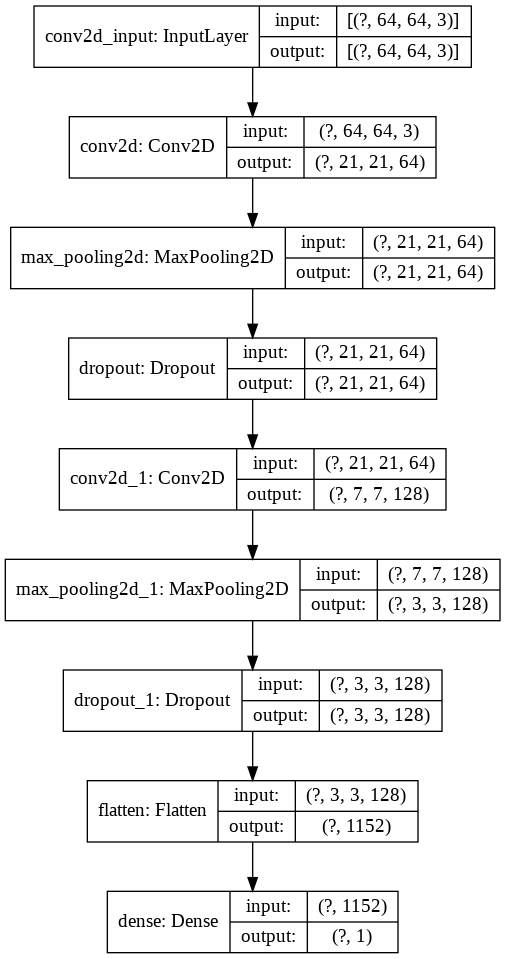

In [22]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [23]:
#train/val test on model #1 basic model

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = validation_generator,
                    epochs=10
)


scores = model.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
175/175 [==============================] - 64s 366ms/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.9195
Epoch 2/10
175/175 [==============================] - 64s 364ms/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.9195
Epoch 3/10
175/175 [==============================] - 64s 365ms/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.9195
Epoch 4/10
175/175 [==============================] - 64s 367ms/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.9195
Epoch 5/10
175/175 [==============================] - 64s 368ms/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.9195
Epoch 6/10
175/175 [==============================] - 64s 364ms/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.9195
Epoch 7/10
175/175 [==============================] - 64s 363ms/step - loss: 1.192

In [24]:
## model 3 : inception layer
## see .ipynb file "model#3_incept" for the training of this model
## this only shows the structure of the model without it's results

from keras.layers import Conv2D, MaxPooling2D

from keras.layers import Input
input_img = Input(shape = (64, 64, 3))

tower_1 = Conv2D(128, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(128, (3,3), padding='same', activation='relu')(tower_1)

tower_2 = Conv2D(128, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(128, (5,5), padding='same', activation='relu')(tower_2)

tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(128, (1,1), padding='same', activation='relu')(tower_3)

output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

from keras.layers import Flatten, Dense
output = Flatten()(output)
out    = Dense(4, activation='softmax')(output)

from keras.models import Model
incept = Model(inputs = input_img, outputs = out)


from keras.optimizers import SGD
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
incept.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
incept.fit(train_generator, validation_data=validation_generator, epochs=epochs, batch_size=4)

from keras.models import model_from_json
import os
model_json = incept.to_json()
with open("incept.json", "w") as json_file:
    json_file.write(model_json)
incept.save_weights(os.path.join(os.getcwd(), 'model.h5'))

scores = incept.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5


InvalidArgumentError: ignored

In [25]:
## structure of model 3
incept.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 64, 64, 128)  512         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 64, 64, 128)  512         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 64, 64, 3)    0           input_1[0][0]                    
_______________________________________________________________________________________

In [26]:
# build on model#2 deeper

deep = Sequential()
deep.add(Convolution2D(64, 3, 3, activation = 'tanh', input_shape = (64,64,3)))
deep.add(Convolution2D(64, 1, 1, activation = 'tanh'))
deep.add(MaxPool2D(pool_size = (1,1)))
deep.add(Dropout(0.25))

deep.add(Convolution2D(256, 1, 1, activation = 'tanh'))


deep.add(Convolution2D(528, 3, 3, activation = 'tanh'))

deep.add(MaxPool2D(pool_size = (2,2), strides= (2,2)))
deep.add(Dropout(0.25))

deep.add(Convolution2D(384, 3, 3, activation = 'tanh'))
deep.add(MaxPool2D(pool_size = (1,1)))
deep.add(Dropout(0.25))


deep.add(Convolution2D(256, 1, 1, activation = 'tanh'))




deep.add(Flatten())
deep.add(Dense(1026, activation = 'tanh'))
deep.add(Dense(256, activation = 'tanh'))
deep.add(Dense(1, activation = 'tanh'))

## Structure of model 2 
deep.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 21, 21, 64)        1792      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 21, 64)        4160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 21, 21, 256)       16640     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 528)         1217040   
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 528)        

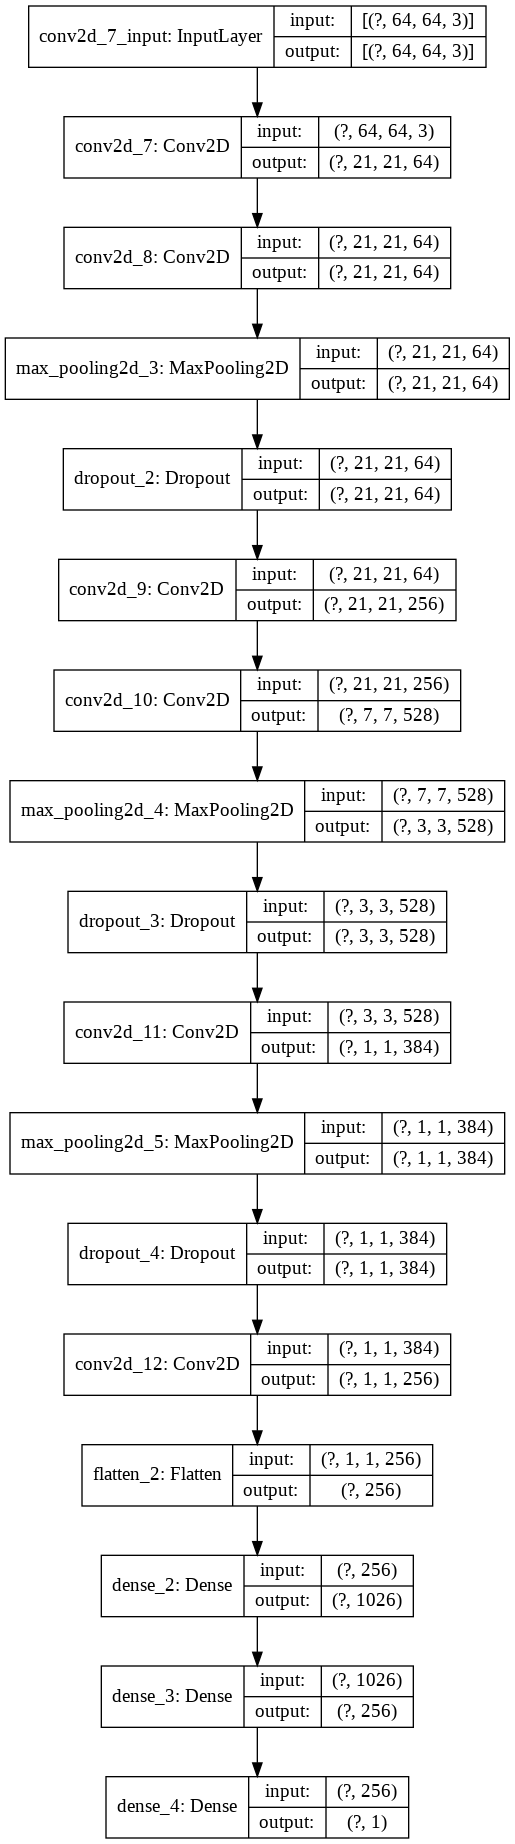

In [27]:
tf.keras.utils.plot_model(deep, to_file='model.png', show_shapes=True, show_layer_names=True)

In [29]:
# model#2 compile and test

from keras.optimizers import SGD
opt = SGD(lr=0.01)

deep.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

deephis = deep.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = validation_generator,
                    epochs=10
)


scores = deep.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/10
175/175 [==============================] - 228s 1s/step - loss: 1.1921e-07 - accuracy: 0.9332 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 2/10
175/175 [==============================] - 230s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 3/10
175/175 [==============================] - 236s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 4/10
175/175 [==============================] - 241s 1s/step - loss: 1.1921e-07 - accuracy: 0.9331 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 5/10
175/175 [==============================] - 240s 1s/step - loss: 1.1921e-07 - accuracy: 0.9332 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 6/10
175/175 [==============================] - 240s 1s/step - loss: 1.1921e-07 - accuracy: 0.9331 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 7/10
175/175 [==============================] - 238s 1s/step - loss: 1.1921e-07 - accura

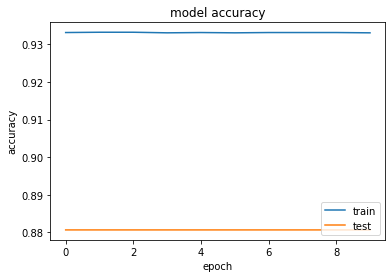

In [31]:
import matplotlib.pyplot as plt

history = deephis

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [32]:
deep.evaluate(test_generator, verbose = 0)

[1.1920928955078125e-07, 0.6422222256660461]

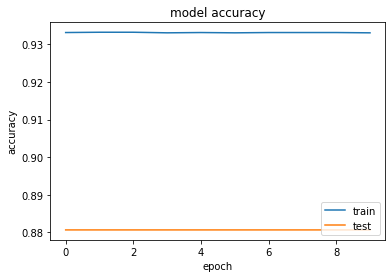

In [33]:
history = deephis

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

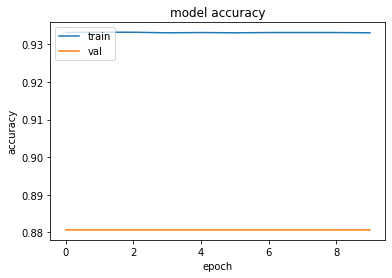

In [34]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

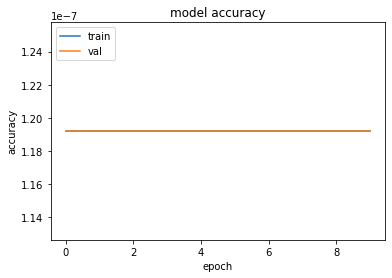

In [38]:


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Step 3
### Experiment with Chosen Model (trying out different Hyperparameters)
> Model 2 : deeper model, had the best results overall.
So model 2 was chosen as the best model to go ahead with.

In [39]:
# model#2 adam opt

from keras.optimizers import SGD
# opt = SGD(lr=0.01)

# deep.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

deephis = deep.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = validation_generator,
                    epochs=5
)


scores = deep.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
175/175 [==============================] - 245s 1s/step - loss: 1.1921e-07 - accuracy: 0.9331 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 2/5
175/175 [==============================] - 229s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 3/5
175/175 [==============================] - 233s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 4/5
175/175 [==============================] - 231s 1s/step - loss: 1.1921e-07 - accuracy: 0.9331 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 5/5
175/175 [==============================] - 231s 1s/step - loss: 1.1921e-07 - accuracy: 0.9330 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Accuracy: 93.33%


In [40]:
# model#2 adagrad opt

from keras.optimizers import SGD
# opt = SGD(lr=0.01)

# deep.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adagrad', metrics = ['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

deephis = deep.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = validation_generator,
                    epochs=5
)


scores = deep.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
175/175 [==============================] - 231s 1s/step - loss: 1.1921e-07 - accuracy: 0.9330 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 2/5
175/175 [==============================] - 233s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 3/5
175/175 [==============================] - 234s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 4/5
175/175 [==============================] - 233s 1s/step - loss: 1.1921e-07 - accuracy: 0.9332 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 5/5
175/175 [==============================] - 233s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Accuracy: 93.33%


In [41]:
# model#2 learing rate 2

from keras.optimizers import SGD

opt = SGD(lr=0.001)

deep.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

deephis = deep.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = validation_generator,
                    epochs=5
)


scores = deep.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
175/175 [==============================] - 236s 1s/step - loss: 1.1921e-07 - accuracy: 0.9332 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 2/5
175/175 [==============================] - 231s 1s/step - loss: 1.1921e-07 - accuracy: 0.9332 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 3/5
175/175 [==============================] - 232s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 4/5
175/175 [==============================] - 231s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 5/5
175/175 [==============================] - 228s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Accuracy: 93.33%


In [42]:
# model#2 learning rate 3

from keras.optimizers import SGD

opt = SGD(lr=0.0001)

deep.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])

# model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size

deephis = deep.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data = validation_generator,
                    epochs=5
)


scores = deep.evaluate(train_generator, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
175/175 [==============================] - 230s 1s/step - loss: 1.1921e-07 - accuracy: 0.9332 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 2/5
175/175 [==============================] - 231s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 3/5
175/175 [==============================] - 238s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 4/5
175/175 [==============================] - 229s 1s/step - loss: 1.1921e-07 - accuracy: 0.9331 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Epoch 5/5
175/175 [==============================] - 243s 1s/step - loss: 1.1921e-07 - accuracy: 0.9333 - val_loss: 1.1921e-07 - val_accuracy: 0.8806
Accuracy: 93.33%


> the above experimentation told us that model 2 would be most effective using a 0.25 dropout, optimiser = SGD, 
learning rate = 0.0001, activation = tanh. So now, we can finally evaluate our chosen model on the test data.
# Step 4
### Evaluate Model 2 on the Test Data
> the accuracy in training & validation was ~90%, and this dropped to ~ 65% for the test data. Loss was negligably small throughout. The accuracy of the model was definitely good enough to detect some features of the model to help identify classes of food from the image source, however the test set was quite small and a larger test set would likely have raised the test accuracy here. Some more steps could also have been taken to reduce overfitting in the model we built. The overall result, though, is good, as the model accurately identifies the correct class of image > 65% of the time. I am confident that with a larger set of data - in the region of 'Big Data' (e.g. > 1PB) - we could achieve a much better test accuracy with the current model.

In [45]:
testa = model.evaluate(test_generator, verbose = 0)
print("Accuracy: %.2f%%" % (testa[1]*100))

Accuracy: 66.58%
